In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from random import shuffle

In [3]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1

In [3]:
data = []
labels = []
for img in os.listdir(r'coins modified'):
    label = label_img(img)
    path = os.path.join(r'coins modified',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [4]:
cols = []
for i in range(4900):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [5]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
70,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1171,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1246,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
971,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
361,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [6]:
test = data.iloc[1800:]
test.reset_index(drop=True,inplace=True)

train = data.iloc[0:1800]
train.reset_index(drop=True,inplace=True)

In [7]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

In [8]:

rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)

RandomForestClassifier()

In [9]:
rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)
rfc

RandomForestClassifier()

In [10]:
y_pred = rfc.predict(test_data)

In [11]:
print (classification_report(test_target,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       296
           1       0.97      0.67      0.79       171

    accuracy                           0.87       467
   macro avg       0.90      0.83      0.85       467
weighted avg       0.88      0.87      0.86       467



In [12]:
# from sklearn.decomposition import PCA
# pca=PCA()
# pca.fit(train_data)
# cumilative_sum = np.cumsum(pca.explained_variance_ratio_)
# pca_plt = plt.figure(figsize=(20,6))
# pca_plt = plt.plot(cumilative_sum, linewidth=3)
# pca_plt = plt.axis([0, 4900, 0, 1])
# pca_plt = plt.xlabel("Dimensions")
# pca_plt = plt.ylabel("Explained Variance")
# x = np.argmax(cumilative_sum >= 0.95) + 1
# pca_plt = plt.plot([x, x], [0, 0.95], "k:")
# pca_plt = plt.plot([0, x], [0.95, 0.95], "k:")
# pca_plt = plt.plot(x, 0.95, "ko")
# plt.grid(True)
# plt.show()


In [13]:
# pca = PCA(n_components = 0.95)
# pca.fit(train_data)
# reduced_train = pd.DataFrame(pca.transform(train_data))
# print("The total amount of dimensions: ",reduced_train.shape[1])

In [14]:
# pca_test = PCA(n_components = 527)
# pca_test.fit(test_data)
# reduced_test = pd.DataFrame(pca.transform(test_data))

In [15]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(train_data, train_target)
# xgb_pred = xgb.predict(test_data)
# print('XGBoost accuracy score: %.2f'%(xgb.score(test_data, test_target)*100),'%')

In [16]:
# reduced_train.shape

In [17]:
# xgb.fit(reduced_train, train_target)
# xgb_pred = xgb.predict(reduced_test)
# print('XGBoost accuracy score: %.2f'%(xgb.score(reduced_test, test_target)*100),'%')

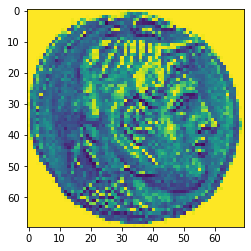

In [19]:
plt.imshow(train_data.iloc[0].values.reshape((70,70)))

In [20]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    test_data_reshaped.append(t)

In [21]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)

In [22]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 42)        12138     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 42)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 52)        19708     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 52)         0

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

Epoch 1/18
18/18 [==============================] - 11s 491ms/step - loss: 0.6447 - accuracy: 0.6594
Epoch 2/18
18/18 [==============================] - 9s 530ms/step - loss: 0.6143 - accuracy: 0.6594
Epoch 3/18
18/18 [==============================] - 9s 496ms/step - loss: 0.3727 - accuracy: 0.8050
Epoch 4/18
18/18 [==============================] - 10s 539ms/step - loss: 0.1174 - accuracy: 0.9628
Epoch 5/18
18/18 [==============================] - 10s 561ms/step - loss: 0.0769 - accuracy: 0.9778
Epoch 6/18
18/18 [==============================] - 10s 532ms/step - loss: 0.0585 - accuracy: 0.9861
Epoch 7/18
18/18 [==============================] - 9s 485ms/step - loss: 0.0474 - accuracy: 0.9878
Epoch 8/18
18/18 [==============================] - 8s 470ms/step - loss: 0.0420 - accuracy: 0.9889
Epoch 9/18
18/18 [==============================] - 8s 464ms/step - loss: 0.0364 - accuracy: 0.9917
Epoch 10/18
18/18 [==============================] - 9s 507ms/step - loss: 0.0335 - accuracy: 0.

In [25]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

15/15 - 1s - loss: 0.0422 - accuracy: 0.9893 - 882ms/epoch - 59ms/step


In [26]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

15/15 [==============================] - 1s 43ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       296
           1       0.99      0.98      0.99       171

    accuracy                           0.99       467
   macro avg       0.99      0.99      0.99       467
weighted avg       0.99      0.99      0.99       467



Text(33.0, 0.5, 'Actual')

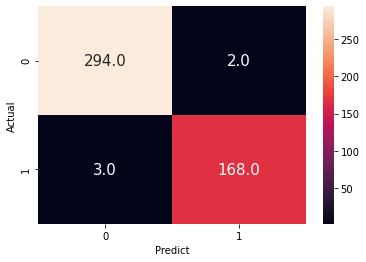

In [27]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(70, 70, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(80, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(60, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(30, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(2))
# model.summary()

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

In [ ]:
# test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

In [ ]:
# test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
# print (classification_report(test_target,test_predict))

In [ ]:
# cm = confusion_matrix(test_target,test_predict)
# sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
# plt.xlabel("Predict")
# plt.ylabel("Actual")

# COLOR

In [ ]:
# data = []
# labels = []
# for img in os.listdir(r'ptolemy silver proarchives'):
#     label = label_img(img)
#     path = os.path.join(r'ptolemy silver proarchives',img)
#     img = cv2.resize(cv2.imread(path),(140,70))
#     data.append(np.array(np.array(img[0:70,0:70]).flatten()))
#     labels.append(label)

In [ ]:
# cols = []
# for i in range(14700):
#     cols.append("pixel_"+str(i))
# data = pd.DataFrame(data, columns=cols)
# data = data/255
# data['label'] = labels
# data = data.sample(frac=1,random_state=0)

In [ ]:
# data.head()

In [ ]:
# test = data.iloc[1800:]
# test.reset_index(drop=True,inplace=True)

# train = data.iloc[0:1800]
# train.reset_index(drop=True,inplace=True)

In [ ]:
# train_data = train.drop('label',axis=1)
# train_target = train['label']

# test_data = test.drop('label',axis=1)
# test_target = test['label']

In [ ]:
# plt.imshow(np.flip(np.array(train_data.loc[1]).reshape(70,70,3),2))

In [ ]:
# train_data_reshaped = []
# test_data_reshaped = []
# for i in range(len(train_data)):
#     t = train_data.iloc[i].values.reshape((70,70,3))
#     t = np.flip(np.array(t),2)
#     train_data_reshaped.append(t)
    
# for i in range(len(test_data)):
#     t = test_data.iloc[i].values.reshape((70,70,3))
#     t = np.flip(np.array(t),2)
#     test_data_reshaped.append(t)

In [ ]:
# plt.imshow(test_data_reshaped[1])

In [ ]:
# train_data_reshaped = np.array(train_data_reshaped)
# test_data_reshaped = np.array(test_data_reshaped)
# test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
# train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(42, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(52, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(62, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(rate = 0.2))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(rate = 0.2))

# model.add(layers.Dense(2))
# model.summary()

In [ ]:
# model.compile(optimizer='rmsprop',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

In [ ]:
# test_loss, test_acc = model.evaluate(test_data_reshaped, test_target, verbose=2)

In [ ]:
# test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
# print (classification_report(test_target,test_predict))

In [ ]:
# cm = confusion_matrix(test_target,test_predict)
# sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
# plt.xlabel("Predict")
# plt.ylabel("Actual")

# 150 X 150

In [36]:
# data = []
# labels = []
# for img in os.listdir(r'coins modified'):
#     label = label_img(img)
#     path = os.path.join(r'coins modified',img)
#     img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(300,150))
#     data.append(np.array(np.array(img[0:150,0:150]).flatten()))
#     labels.append(label)

ERROR! Session/line number was not unique in database. History logging moved to new session 368


In [37]:
# cols = []
# for i in range(22500):
#     cols.append("pixel_"+str(i))
# data = pd.DataFrame(data, columns=cols)
# data = data/255
# data['label'] = labels
# data = data.sample(frac=1,random_state=0)

In [38]:
# test = data.iloc[1800:]
# test.reset_index(drop=True,inplace=True)

# train = data.iloc[0:1800]
# train.reset_index(drop=True,inplace=True)

In [39]:
# train_data = train.drop('label',axis=1)
# train_target = train['label']

# test_data = test.drop('label',axis=1)
# test_target = test['label']

In [40]:
# train_data_reshaped = []
# test_data_reshaped = []
# for i in range(len(train_data)):
#     t = train_data.iloc[i].values.reshape((150,150))
#     t = np.array(t)
#     train_data_reshaped.append(t)
    
# for i in range(len(test_data)):
#     t = test_data.iloc[i].values.reshape((150,150))
#     t = np.array(t)
#     test_data_reshaped.append(t)

In [41]:
# train_data_reshaped = np.array(train_data_reshaped)
# test_data_reshaped = np.array(test_data_reshaped)

In [42]:
# test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
# train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [43]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(42, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(52, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(62, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(2))
# model.summary()

In [44]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

In [45]:
# test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

In [46]:
# test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
# print (classification_report(test_target,test_predict))

In [47]:
# cm = confusion_matrix(test_target,test_predict)
# sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
# plt.xlabel("Predict")
# plt.ylabel("Actual")

In [48]:
# plt.imshow(train_data.iloc[0].values.reshape((150,150)))

# with ptolemy 6

In [4]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1
    elif word_label == '6' : return 2


In [6]:
data = []
labels = []
for img in os.listdir(r'mixed'):
    label = label_img(img)
    path = os.path.join(r'mixed',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [7]:
cols = []
for i in range(4900):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [8]:
len(data)

2996

In [9]:
data.head(10)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
1300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
263,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1948,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
2116,0.996078,0.992157,0.996078,0.992157,0.992157,0.996078,0.992157,0.996078,0.992157,0.988235,...,0.992157,0.988235,0.992157,0.988235,0.992157,0.992157,0.988235,0.988235,0.988235,1
812,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1357,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2946,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
1761,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
817,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0


In [10]:
train = data.iloc[0:2500]
train.reset_index(drop=True,inplace=True)

test = data.iloc[2500:]
test.reset_index(drop=True,inplace=True)


In [11]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

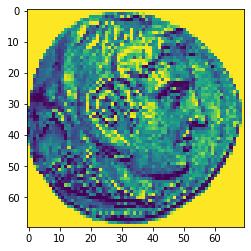

In [12]:
plt.imshow(train_data.iloc[0].values.reshape((70,70)))

In [13]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    test_data_reshaped.append(t)

In [14]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)

In [15]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 42)        12138     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 42)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 52)        19708     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 52)        

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=18,batch_size=100)

Epoch 1/18
25/25 [==============================] - 18s 603ms/step - loss: 1.0376 - accuracy: 0.4892
Epoch 2/18
25/25 [==============================] - 13s 532ms/step - loss: 0.9573 - accuracy: 0.5188
Epoch 3/18
25/25 [==============================] - 14s 550ms/step - loss: 0.5540 - accuracy: 0.7892
Epoch 4/18
25/25 [==============================] - 13s 531ms/step - loss: 0.3485 - accuracy: 0.8660
Epoch 5/18
25/25 [==============================] - 16s 624ms/step - loss: 0.2673 - accuracy: 0.9020
Epoch 6/18
25/25 [==============================] - 14s 552ms/step - loss: 0.2264 - accuracy: 0.9208
Epoch 7/18
25/25 [==============================] - 14s 546ms/step - loss: 0.1922 - accuracy: 0.9308
Epoch 8/18
25/25 [==============================] - 14s 541ms/step - loss: 0.1762 - accuracy: 0.9436
Epoch 9/18
25/25 [==============================] - 13s 527ms/step - loss: 0.1611 - accuracy: 0.9444
Epoch 10/18
25/25 [==============================] - 14s 552ms/step - loss: 0.1261 - accura

In [49]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

16/16 - 2s - loss: 0.1445 - accuracy: 0.9657 - 2s/epoch - 110ms/step


In [50]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

16/16 [==============================] - 2s 58ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       237
           1       0.96      0.92      0.94       138
           2       0.92      0.97      0.94       121

    accuracy                           0.97       496
   macro avg       0.96      0.96      0.96       496
weighted avg       0.97      0.97      0.97       496



Text(33.0, 0.5, 'Actual')

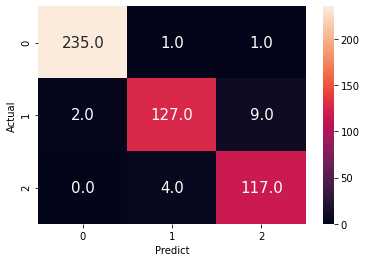

In [51]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

# ptolemy 12

In [2]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1
    elif word_label == '6' : return 2
    elif word_label == '12' : return 3


In [41]:
data = []
labels = []
for img in os.listdir(r'mixed'):
    label = label_img(img)
    path = os.path.join(r'mixed',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(300,150))
    data.append(np.array(np.array(img[0:150,0:150]).flatten()))
    labels.append(label)

In [42]:
cols = []
for i in range(22500):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [43]:
len(data)

3665

In [45]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_22491,pixel_22492,pixel_22493,pixel_22494,pixel_22495,pixel_22496,pixel_22497,pixel_22498,pixel_22499,label
775,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
117,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
2601,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3324,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [46]:
n = 150
test = data.groupby('label').get_group(0).sample(n = n)
test = test.append(data.groupby('label').get_group(1).sample(n = n))
test = test.append(data.groupby('label').get_group(2).sample(n = n))
test = test.append(data.groupby('label').get_group(3).sample(n = n))
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_22491,pixel_22492,pixel_22493,pixel_22494,pixel_22495,pixel_22496,pixel_22497,pixel_22498,pixel_22499,label
755,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0
1364,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.0,0
1004,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0
585,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0
1289,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0


In [47]:
train = data[ ~data.index.isin(test.index) ]
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_22491,pixel_22492,pixel_22493,pixel_22494,pixel_22495,pixel_22496,pixel_22497,pixel_22498,pixel_22499,label
775,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
117,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
2601,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3324,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [48]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

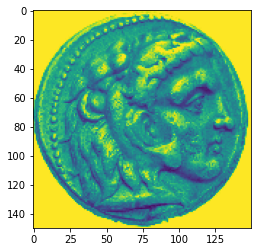

In [49]:
plt.imshow(train_data.iloc[0].values.reshape((150,150)))

In [50]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((150,150))
    t = np.array(t)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((150,150))
    t = np.array(t)
    test_data_reshaped.append(t)

In [51]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)

In [52]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 42)        12138     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 42)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 34, 34, 52)        19708     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 52)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 62)       

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=5)

Epoch 1/5
96/96 [==============================] - 43s 444ms/step - loss: 0.0436 - accuracy: 0.9866
Epoch 2/5
96/96 [==============================] - 44s 457ms/step - loss: 0.0307 - accuracy: 0.9899
Epoch 3/5
96/96 [==============================] - 38s 400ms/step - loss: 0.0226 - accuracy: 0.9935
Epoch 4/5
96/96 [==============================] - 35s 368ms/step - loss: 0.0089 - accuracy: 0.9964
Epoch 5/5
96/96 [==============================] - 36s 374ms/step - loss: 0.0134 - accuracy: 0.9964


In [67]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

19/19 - 1s - loss: 0.3936 - accuracy: 0.9233


In [68]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.95      0.93      0.94       150
           2       0.89      0.87      0.88       150
           3       0.87      0.93      0.90       150

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



Text(33.0, 0.5, 'Actual')

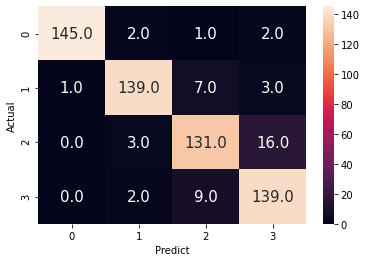

In [69]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

# VGG with ptolmy I VI XII

In [29]:
data = []
labels = []
for img in os.listdir(r'mixed'):
    label = label_img(img)
    path = os.path.join(r'mixed',img)
    img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [30]:
cols = []
for i in range(4900):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [31]:
len(data)

3665

In [32]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
775,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
117,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
2601,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3324,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [36]:
n = 150
test = data.groupby('label').get_group(0).sample(n = n)
test = test.append(data.groupby('label').get_group(1).sample(n = n))
test = test.append(data.groupby('label').get_group(2).sample(n = n))
test = test.append(data.groupby('label').get_group(3).sample(n = n))
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
642,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
358,0.972549,0.960784,0.968627,0.968627,0.960784,0.960784,0.972549,0.905882,0.772549,0.725490,...,0.949020,0.984314,0.976471,0.984314,0.988235,0.980392,0.988235,0.909804,0.992157,0
1057,0.972549,0.976471,0.980392,0.972549,0.984314,0.984314,0.972549,0.984314,0.984314,0.972549,...,0.933333,0.933333,0.933333,0.929412,0.933333,0.933333,0.917647,0.933333,0.933333,0
189,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
339,0.760784,0.749020,0.450980,0.768627,0.682353,0.635294,0.650980,0.701961,0.760784,0.788235,...,0.470588,0.533333,0.549020,0.603922,0.545098,0.533333,0.458824,0.462745,0.996078,0


In [37]:
train = data[ ~data.index.isin(test.index) ]
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
775,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
117,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
2601,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3324,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [38]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

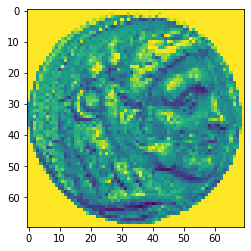

In [39]:
plt.imshow(train_data.iloc[0].values.reshape(70,70))

In [40]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    test_data_reshaped.append(t)

In [41]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)

In [42]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [43]:
train_data_reshaped.shape

(3065, 70, 70, 1)

In [127]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(70, 70, 1)))
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(42, (3, 3), padding = 'same', activation='relu'))
model.add(layers.Conv2D(42, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(52, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(62, (3, 3), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_234 (Conv2D)          (None, 70, 70, 32)        320       
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 70, 70, 32)        9248      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 35, 35, 42)        12138     
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 35, 35, 42)        15918     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 17, 17, 42)        0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 17, 17, 52)      

In [107]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(inputs, filters, strides=1):
    shortcut = inputs

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Skip connection
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, kernel_size=(3, 3), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = residual_block(x, filters=32, strides=1)
    x = residual_block(x, filters=32, strides=1)
    x = residual_block(x, filters=64, strides=2)
    x = residual_block(x, filters=64, strides=1)
    x = residual_block(x, filters=128, strides=2)
    x = residual_block(x, filters=128, strides=1)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (70, 70, 1)
num_classes = 4

model = create_resnet(input_shape, num_classes)
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 70, 70, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 35, 35, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 35, 35, 32)   128         conv2d_192[0][0]                 
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 35, 35, 32)   0           batch_normalization_43[0][0]     
_______________________________________________________________________________________

In [128]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=12,steps_per_epoch=300)

Epoch 1/12
300/300 [==============================] - 29s 96ms/step - loss: 1.0178 - accuracy: 0.5531
Epoch 2/12
300/300 [==============================] - 31s 102ms/step - loss: 0.4977 - accuracy: 0.7940
Epoch 3/12
300/300 [==============================] - 31s 102ms/step - loss: 0.3019 - accuracy: 0.8929
Epoch 4/12
300/300 [==============================] - 31s 103ms/step - loss: 0.2335 - accuracy: 0.9196
Epoch 5/12
300/300 [==============================] - 31s 103ms/step - loss: 0.1870 - accuracy: 0.9336
Epoch 6/12
300/300 [==============================] - 31s 102ms/step - loss: 0.1545 - accuracy: 0.9499
Epoch 7/12
300/300 [==============================] - 31s 103ms/step - loss: 0.1315 - accuracy: 0.9542
Epoch 8/12
300/300 [==============================] - 31s 103ms/step - loss: 0.0970 - accuracy: 0.9666
Epoch 9/12
300/300 [==============================] - 31s 104ms/step - loss: 0.0895 - accuracy: 0.9684
Epoch 10/12
300/300 [==============================] - 31s 103ms/step - lo

 48/300 [===>..........................] - 5s 104ms/step - loss: 0.0721 - accuracy: 0.9790


In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=3)

Epoch 1/3
96/96 [==============================] - 33s 347ms/step - loss: 0.7641 - accuracy: 0.9814
Epoch 2/3
96/96 [==============================] - 38s 391ms/step - loss: 0.7607 - accuracy: 0.9840
Epoch 3/3
96/96 [==============================] - 38s 397ms/step - loss: 0.7574 - accuracy: 0.9866


In [87]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=7)

Epoch 1/7
96/96 [==============================] - 12s 120ms/step - loss: 0.0721 - accuracy: 0.9755
Epoch 2/7
96/96 [==============================] - 13s 134ms/step - loss: 0.0444 - accuracy: 0.9837
Epoch 3/7
96/96 [==============================] - 13s 140ms/step - loss: 0.0879 - accuracy: 0.9703
Epoch 4/7
96/96 [==============================] - 16s 165ms/step - loss: 0.0431 - accuracy: 0.9853
Epoch 5/7
96/96 [==============================] - 14s 144ms/step - loss: 0.0432 - accuracy: 0.9840
Epoch 6/7
96/96 [==============================] - 14s 145ms/step - loss: 0.0542 - accuracy: 0.9788
Epoch 7/7
96/96 [==============================] - 13s 140ms/step - loss: 0.0387 - accuracy: 0.9866


In [116]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=5)

Epoch 1/5
96/96 [==============================] - 38s 393ms/step - loss: 0.7582 - accuracy: 0.9860
Epoch 2/5
96/96 [==============================] - 41s 423ms/step - loss: 0.7593 - accuracy: 0.9847
Epoch 3/5
96/96 [==============================] - 40s 419ms/step - loss: 0.7583 - accuracy: 0.9860
Epoch 4/5
96/96 [==============================] - 40s 419ms/step - loss: 0.7583 - accuracy: 0.9863
Epoch 5/5
96/96 [==============================] - 41s 426ms/step - loss: 0.7572 - accuracy: 0.9873


In [129]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

19/19 - 1s - loss: 0.3624 - accuracy: 0.9100


In [114]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       150
           1       0.99      0.89      0.94       150
           2       0.91      0.83      0.87       150
           3       0.84      0.97      0.90       150

    accuracy                           0.92       600
   macro avg       0.93      0.92      0.92       600
weighted avg       0.93      0.92      0.92       600



Text(33.0, 0.5, 'Actual')

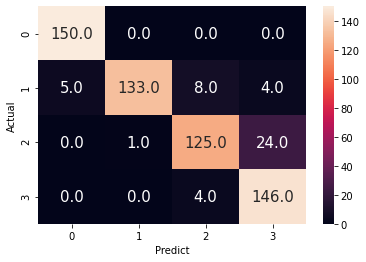

In [115]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

# ptolemy 9

In [107]:
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == '0' : return 0
    elif word_label == '1' : return 1
    elif word_label == '6' : return 2
    elif word_label == '9' : return 3
    elif word_label == '12' : return 4


In [108]:
data = []
labels = []
for img in os.listdir(r'mixed'):
    label = label_img(img)
    path = os.path.join(r'mixed',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(140,70))
    data.append(np.array(np.array(img[0:70,0:70]).flatten()))
    labels.append(label)

In [109]:
cols = []
for i in range(4900):
    cols.append("pixel_"+str(i))
data = pd.DataFrame(data, columns=cols)
data = data/255
data['label'] = labels
data = data.sample(frac=1,random_state=0)

In [110]:
len(data)

4239

In [ ]:
data.head(20)

In [130]:
n = 150
test = data.groupby('label').get_group(0).sample(n = n)
test = test.append(data.groupby('label').get_group(1).sample(n = n))
test = test.append(data.groupby('label').get_group(2).sample(n = n))
test = test.append(data.groupby('label').get_group(3).sample(n = n))
test = test.append(data.groupby('label').get_group(4).sample(n = n))
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
111,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
461,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
28,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1045,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
626,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [131]:
train = data[ ~data.index.isin(test.index) ]
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4891,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,label
1465,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
302,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
87,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1431,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
661,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [132]:
train_data = train.drop('label',axis=1)
train_target = train['label']

test_data = test.drop('label',axis=1)
test_target = test['label']

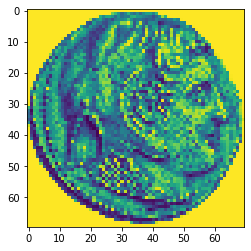

In [133]:
plt.imshow(train_data.iloc[0].values.reshape((70,70)))

In [134]:
train_data_reshaped = []
test_data_reshaped = []
for i in range(len(train_data)):
    t = train_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    train_data_reshaped.append(t)
    
for i in range(len(test_data)):
    t = test_data.iloc[i].values.reshape((70,70))
    t = np.array(t)
    test_data_reshaped.append(t)

In [135]:
train_data_reshaped = np.array(train_data_reshaped)
test_data_reshaped = np.array(test_data_reshaped)

In [136]:
test_data_reshaped = np.expand_dims(test_data_reshaped,axis=-1)
train_data_reshaped = np.expand_dims(train_data_reshaped,axis=-1)

In [139]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(42, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(52, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(62, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 68, 68, 32)        320       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 32, 32, 42)        12138     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 16, 16, 42)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 14, 14, 52)        19708     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 7, 7, 52)          0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 5, 5, 62)        

In [140]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data_reshaped, train_target, epochs=30,batch_size=100)

Epoch 1/30
35/35 [==============================] - 7s 203ms/step - loss: 1.5129 - accuracy: 0.3772
Epoch 2/30
35/35 [==============================] - 7s 201ms/step - loss: 1.2489 - accuracy: 0.4580
Epoch 3/30
35/35 [==============================] - 7s 203ms/step - loss: 0.9202 - accuracy: 0.6128
Epoch 4/30
35/35 [==============================] - 7s 203ms/step - loss: 0.7860 - accuracy: 0.6778
Epoch 5/30
35/35 [==============================] - 7s 201ms/step - loss: 0.6917 - accuracy: 0.7303
Epoch 6/30
35/35 [==============================] - 7s 201ms/step - loss: 0.6128 - accuracy: 0.7607
Epoch 7/30
35/35 [==============================] - 7s 202ms/step - loss: 0.5560 - accuracy: 0.7971
Epoch 8/30
35/35 [==============================] - 7s 201ms/step - loss: 0.4937 - accuracy: 0.8174
Epoch 9/30
35/35 [==============================] - 7s 209ms/step - loss: 0.4504 - accuracy: 0.8381
Epoch 10/30
35/35 [==============================] - 7s 208ms/step - loss: 0.4297 - accuracy: 0.8444

In [141]:
test_loss, test_acc = model.evaluate(test_data_reshaped,  test_target, verbose=2)

24/24 - 0s - loss: 0.8859 - accuracy: 0.8133


In [142]:
test_predict = np.argmax(model.predict(test_data_reshaped),axis=-1)
print (classification_report(test_target,test_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       150
           1       0.91      0.92      0.91       150
           2       0.76      0.81      0.78       150
           3       0.73      0.62      0.67       150
           4       0.70      0.73      0.72       150

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750



Text(33.0, 0.5, 'Actual')

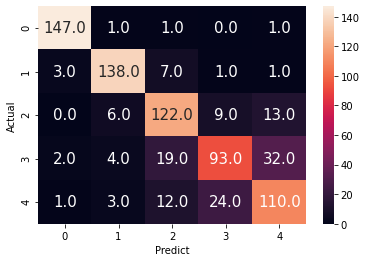

In [143]:
cm = confusion_matrix(test_target,test_predict)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")